In [1]:
from matplotlib import pyplot as plt
import librosa
import librosa.display

(4000,)


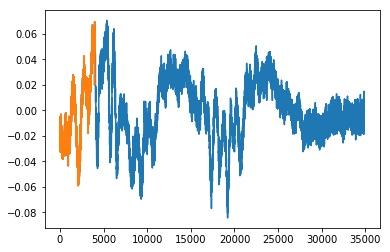

In [16]:
audio,sr = librosa.load('data/train/sil_4.wav',sr=16000)
aud_trimmed, index = librosa.effects.trim(audio, top_db=10)
aud_center = librosa.util.pad_center(aud_trimmed[:4000], 4000)
print(aud_center.shape)
plt.plot(audio)
plt.plot(aud_center)

In [5]:
mfccs = librosa.feature.mfcc(aud_trimmed, sr=16000)

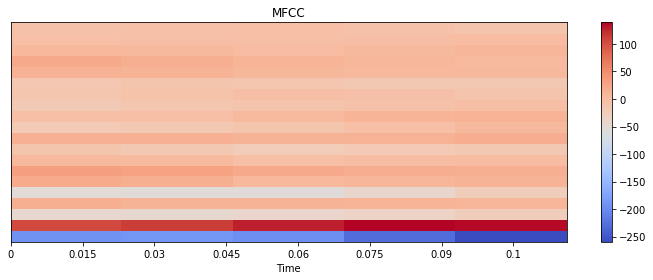

In [6]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()


In [ ]:
mfccs.shape

In [ ]:
silence, sr = librosa.load('data/train/sil_10.wav',sr=16000)

In [ ]:
mfccs = librosa.feature.mfcc(silence, sr=16000)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
down, sr = librosa.load('data/train/down_1.wav',sr=16000)

In [ ]:
mfccs = librosa.feature.mfcc(down, sr=16000)

In [ ]:
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()
plt.show()

In [ ]:
mfccs.shape

In [1]:
from torch.utils.data import DataLoader
from utils import Pairloader, SiameseNet

In [2]:
data_set = Pairloader()

In [3]:
a= data_set.__getitem__(0)

In [17]:
a[0][1].min()


-367.2155

In [12]:
data_gen = DataLoader(data_set, batch_size=1)

In [18]:
for i, batch in enumerate(data_gen):
    print(batch[0][0].shape)
    print(batch[0][1].min())
    break

torch.Size([1, 1, 20, 8])
tensor(-367.2155)


In [10]:
model = SiameseNet().cuda()

In [11]:
for i, batch in enumerate(data_gen):
    data, label = [batch[0][0].cuda(), batch[0][1].cuda()], batch[1].cuda()
    
    output = model(data)
    print(output)
    
    break

tensor([[0.5819]], device='cuda:0', grad_fn=<SigmoidBackward>)


In [12]:
output.shape

torch.Size([1, 1])

In [1]:
from torch.utils.data import DataLoader
from utils import Pairloader, SiameseNet
from torchsummary import summary

In [2]:
model = SiameseNet().cuda()

In [3]:
summary(model, (1,1,20,8))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 64, 17, 5]           1,088
            Conv2d-2           [-1, 128, 15, 3]          73,856
            Conv2d-3           [-1, 128, 14, 2]          65,664
         MaxPool2d-4            [-1, 128, 7, 1]               0
            Linear-5                  [-1, 512]         459,264
            Conv2d-6            [-1, 64, 17, 5]           1,088
            Conv2d-7           [-1, 128, 15, 3]          73,856
            Conv2d-8           [-1, 128, 14, 2]          65,664
         MaxPool2d-9            [-1, 128, 7, 1]               0
           Linear-10                  [-1, 512]         459,264
           Linear-11                    [-1, 1]             513
Total params: 1,200,257
Trainable params: 1,200,257
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forw